# Covid Senegal

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [109]:
df = pd.read_csv("https://raw.githubusercontent.com/maelfabien/COVID-19-Senegal/master/COVID_Senegal.csv", sep=";")
df.head()

,Date,Positif,Negatif,Age,Homme,Femme,Décédé,Guéri,Nationalité,Resident Senegal,Ville,Facteur,Source/Voyage,Hopital,Temps Hospitalisation (j)
0,02.03.20,1,0,68.0,1.0,0.0,0.0,1.0,France,Oui,Dakar,Importé,France,FANN,4.0
1,03.03.20,0,1,NaN,1.0,0.0,0.0,1.0,Gambie,Non,Dakar,Importé,Espagne,FANN,NaN
2,03.03.20,1,0,80.0,1.0,0.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,10.0
3,04.03.20,1,0,68.0,0.0,1.0,0.0,1.0,France,Non,Dakar,Importé,France,FANN,15.0
4,04.03.20,1,0,33.0,0.0,1.0,0.0,1.0,Angleterre,Non,Dakar,Importé,Angleterre,FANN,7.0


### Q2

In [114]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

evol_cases = df[['Date', 'Positif', 'Negatif', 'Décédé', 'Guéri']].groupby("Date").sum().cumsum()

# on utilise tail car on a pris une somme cumulative, donc la dernière ligne a le total
total_positif = evol_cases.tail(1)['Positif'][0]
total_negatif = evol_cases.tail(1)['Negatif'][0]
total_decede = evol_cases.tail(1)['Décédé'][0]
total_gueri = evol_cases.tail(1)['Guéri'][0]

In [111]:
evol_cases.head()

,Positif,Negatif,Décédé,Guéri
Date,,,,
2020-03-02,1,0,0.0,1.0
2020-03-03,2,1,0.0,3.0
2020-03-04,4,1,0.0,5.0
2020-03-06,4,3,0.0,5.0
2020-03-07,4,5,0.0,5.0


In [116]:
total_positif, total_negatif, int(total_decede), int(total_gueri)

(222, 1774, 2, 81)

### Q3

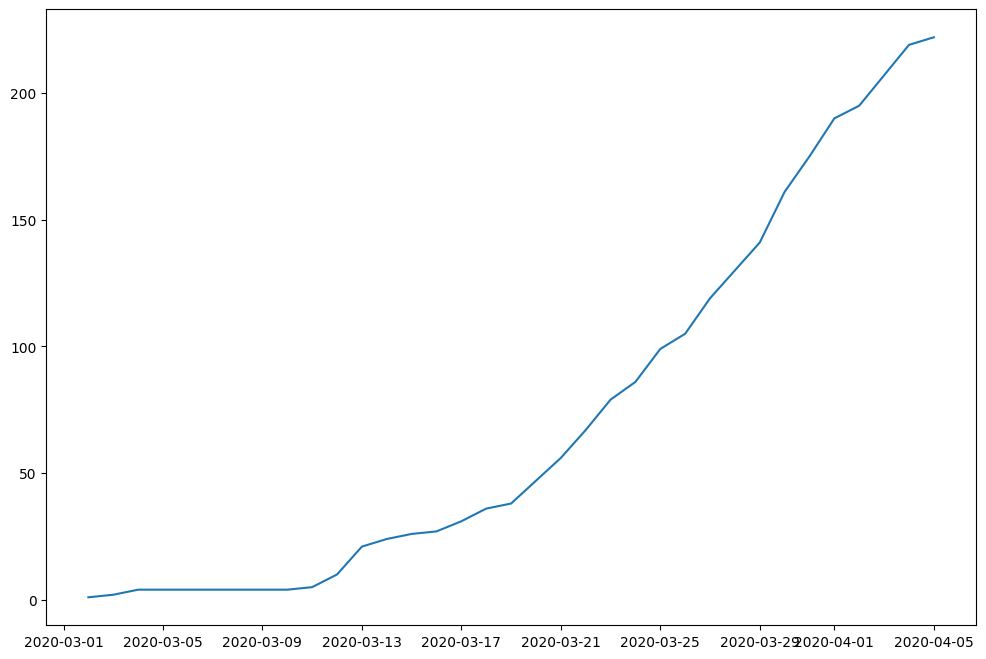

In [117]:
plt.figure(figsize=(12,8))
plt.plot(evol_cases['Positif'])
plt.show()

### Q4

In [118]:
evol_cases['Actifs'] = evol_cases['Positif'] - evol_cases['Guéri']


In [119]:
evol_cases['Actifs']

Date
2020-03-02      0.0
2020-03-03     -1.0
2020-03-04     -1.0
2020-03-06     -1.0
2020-03-07     -1.0
2020-03-08     -1.0
2020-03-09     -1.0
2020-03-10     -1.0
2020-03-11     -1.0
2020-03-12     -1.0
2020-03-13     -1.0
2020-03-14     -1.0
2020-03-15     -1.0
2020-03-16     -1.0
2020-03-17     -1.0
2020-03-18     -1.0
2020-03-19     -1.0
2020-03-20     -1.0
2020-03-21     -1.0
2020-03-22      0.0
2020-03-23      0.0
2020-03-24      5.0
2020-03-25     18.0
2020-03-26     24.0
2020-03-27     38.0
2020-03-28     49.0
2020-03-29     60.0
2020-03-30     80.0
2020-03-31     94.0
2020-04-01    109.0
2020-04-02    114.0
2020-04-03    126.0
2020-04-04    138.0
2020-04-05    141.0
Name: Actifs, dtype: float64

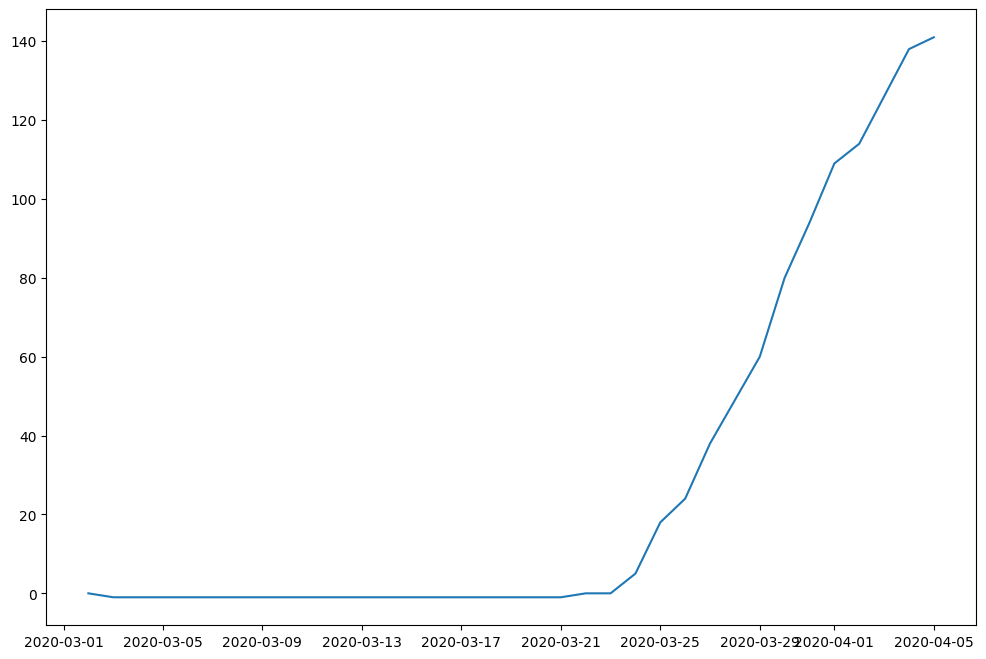

In [120]:
plt.figure(figsize=(12,8))
plt.plot(evol_cases['Actifs'])
plt.show()

### Q5

In [121]:
chart = alt.Chart(evol_cases.reset_index()).mark_line(size=5, point=True).encode(
    x='Date:T',
    y='Positif:Q'
).properties(title="Evolution of the number of positive cases", height=400, width=700)

chart

alt.Chart(...)

In [123]:
chart = alt.Chart(evol_cases.reset_index()).mark_line(size=5, point=True).encode(
    x='Date:T',
    y='Actifs:Q'
).properties(title="Evolution of the number of active cases", height=400, width=700)

chart

alt.Chart(...)

### Q6

In [124]:
chart = alt.Chart(evol_cases.reset_index()).transform_fold(
    ['Positif', 'Actifs'],
).mark_line(size=5, point=True).encode(
    x='Date:T',
    y='value:Q',
    color='key:N',
    tooltip="value:Q"
).properties(height=400, width=700)

chart

alt.Chart(...)

### Q7

In [138]:
facteur = df[['Date', 'Facteur']].dropna()
facteur['Count'] = 1

importe = facteur[facteur['Facteur'] == "Importé"].groupby("Date").sum().cumsum().reset_index()
voyage = facteur[facteur['Facteur'] == "Contact"].groupby("Date").sum().cumsum().reset_index()
communaute = facteur[facteur['Facteur'] == "Communauté"].groupby("Date").sum().cumsum().reset_index()

df_int = pd.merge(importe, voyage, left_on='Date', right_on='Date', how='outer')
df_int = pd.merge(df_int, communaute, left_on='Date', right_on='Date', how='outer')

df_int['Date'] = pd.to_datetime(df_int['Date'], dayfirst=True)
df_int = df_int.sort_values("Date").ffill().fillna(0)
df_int.columns = ["Date", "Importés", "Contact", "Communauté"]
df_int = df_int.astype({"Importés":"int", "Contact":"int", "Communauté":"int"})

df_int

<ipython-input-138-767c362a48e4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  importe = facteur[facteur['Facteur'] == "Importé"].groupby("Date").sum().cumsum().reset_index()
<ipython-input-138-767c362a48e4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  voyage = facteur[facteur['Facteur'] == "Contact"].groupby("Date").sum().cumsum().reset_index()
<ipython-input-138-767c362a48e4>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the

,Date,Importés,Contact,Communauté
0,2020-03-02,1,0,0
1,2020-03-03,3,0,0
2,2020-03-04,5,0,0
3,2020-03-11,6,0,0
26,2020-03-12,6,5,0
27,2020-03-13,6,16,0
4,2020-03-14,8,17,0
5,2020-03-15,9,18,0
6,2020-03-16,10,18,0
7,2020-03-17,13,19,0


### Q8

In [128]:
print("Total imported cases: ", facteur[facteur['Facteur'] == "Importé"].groupby("Date").sum().sum()[0])
print("Total contact cases: ", facteur[facteur['Facteur'] == "Contact"].groupby("Date").sum().sum()[0])
print("Total community cases: ", facteur[facteur['Facteur'] == "Communauté"].groupby("Date").sum().sum()[0])


Total imported cases:  86
Total contact cases:  125
Total community cases:  12


<ipython-input-128-cd6d776514b5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Total imported cases: ", facteur[facteur['Facteur'] == "Importé"].groupby("Date").sum().sum()[0])
<ipython-input-128-cd6d776514b5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("Total contact cases: ", facteur[facteur['Facteur'] == "Contact"].groupby("Date").sum().sum()[0])
<ipython-input-128-cd6d776514b5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which shoul

### Q9

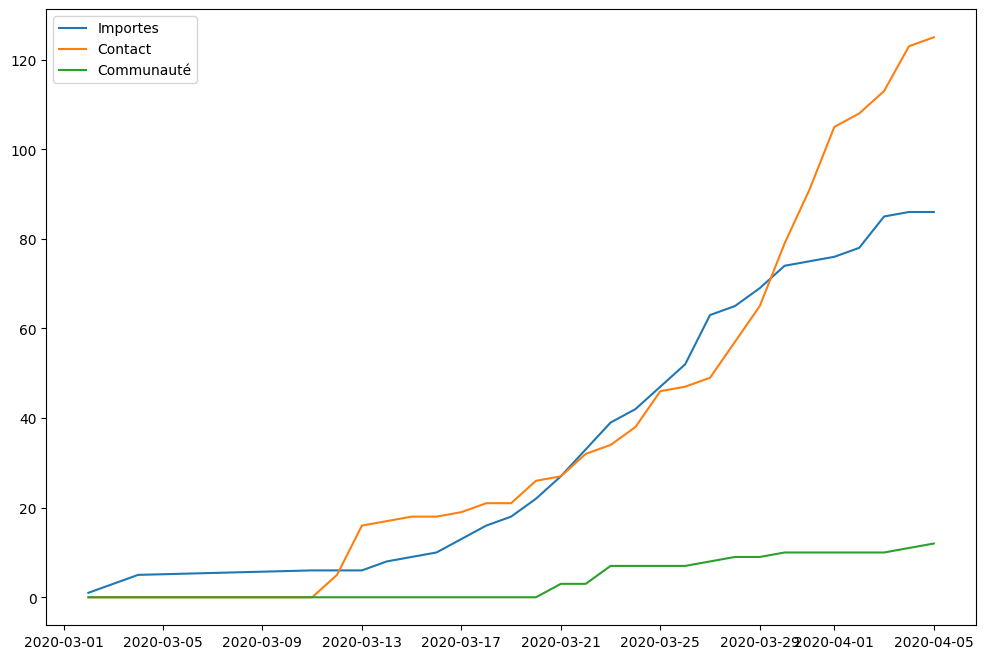

In [129]:
plt.figure(figsize=(12,8))
plt.plot(df_int['Date'], df_int['Importés'], label="Importes")
plt.plot(df_int['Date'], df_int['Contact'], label="Contact")
plt.plot(df_int['Date'], df_int['Communauté'], label="Communauté")
plt.legend()
plt.show()

### Q10

In [139]:
ch0 = alt.Chart(df_int).transform_fold(
    ['Importés', 'Contact', 'Communauté'],
).mark_line(size=5).encode(
    x='Date:T',
    y='value:Q',
    color='key:N'
).properties(height=500, width=700)

ch0

alt.Chart(...)

### Q11

In [131]:
ch1 = alt.Chart(df.dropna(subset=['Source/Voyage'])).mark_bar().encode(
    x = 'Source/Voyage:N',
    y=alt.Y('count()', title='Number of patients')
).properties(title="Source", height=300, width=700)

ch1.interactive()

alt.Chart(...)

### Q12

In [137]:
print("1. The average age of patients is ", np.mean(df['Age'].dropna()))

ch = alt.Chart(df).mark_bar().encode(
    x = 'Age:Q',
    y=alt.Y('count()', title='Number of patients')
).properties(title="Age of patients ", height=300, width=700)


1. The average age of patients is  50.72727272727273


In [133]:
print("2. Most known patients are males")

print(pd.DataFrame(df[['Homme', 'Femme']].dropna().sum()).transpose())

2. Most known patients are males
   Homme  Femme
0    9.0    4.0


In [134]:
print("3. Most patients are in Dakar")

ch2 = alt.Chart(df.dropna(subset=['Ville'])).mark_bar().encode(
    x = 'Ville:N',
    y=alt.Y('count()', title='Number of patients')
).properties(title="City of patients", height=300, width=700)

ch2

3. Most patients are in Dakar


alt.Chart(...)

In [135]:
print("4. Most sick people live in Senegal")

print(df['Resident Senegal'].dropna().value_counts())

4. Most sick people live in Senegal
Oui    22
Non     6
Name: Resident Senegal, dtype: int64
